In [1]:
# Import matplotlib before seaborn
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import itertools  # for color palette cycling
import os
import re
import pandas as pd
import seaborn as sns
import sys
from cycler import cycler
import seaborn as sns
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import networkx as nx
import numpy as np

In [4]:
sys.path.append('/work/rnaseq/pcor_new/networkx')
import networkx_helpers as nxh
import networkx_explore as nxe

cannot use community detection algorithms in pyton 3 (that's you!)


In [5]:
plot_dir = '170417_results_across_networks'
if not os.path.exists(plot_dir):
    os.mkdir(plot_dir)

In [6]:
! ls

170406_look_at_GeneNet_network--before_cutoff_correction.ipynb
170406_look_at_GeneNet_network_with_NetworkX--old.ipynb
170411_explore_networks_with_differet_cutoffs--debug_completed.ipynb
170411_explore_networks_with_differet_cutoffs.ipynb
170411_figure_out_node_loading_oddity--done.ipynb
170412_explore_cutoff_0.001
170412_explore_cutoff_0.01
170412_look_at_GeneNet_network.ipynb
170412_results_across_networks
170415_network_analysis_on_GeneNet_network.ipynb
170415_networkX_explore_cutoff_0.001
170417_explore_networks--methylotrophy_and_phage_networks.ipynb
170417_results_across_networks
broken_gene_names
cutoff_0.0005
cutoff_0.0008
cutoff_0.001
cutoff_0.005
cutoff_0.01
cutoff_0.05
cutoff_0.1
input_for_R--unnormalized_fracs_of_fastq.tsv
input_to_R--no_features_dropped.tsv
old
prep_input.py
README
results_170409
results_170409_627_features_100_edges
reuslts
Rplots1.pdf
Rplots.pdf
run_all.sh
run_GeneNet_and_summarize.R
RUN.sh
try_small_dataset--0.1_DEV
try_whole_dataset


In [7]:
import glob

In [8]:
! ls cutoff_0.1/results/data/*_edges.tsv

cutoff_0.1/results/data/input_to_R--no_features_dropped--top_41328_edges.tsv


In [9]:
glob.glob('cutoff_*/results/data/*_edges.tsv')

['cutoff_0.05/results/data/input_to_R--no_features_dropped--top_196251_edges.tsv',
 'cutoff_0.005/results/data/input_to_R--no_features_dropped--top_1e+06_edges.tsv',
 'cutoff_0.01/results/data/input_to_R--no_features_dropped--top_1e+06_edges.tsv',
 'cutoff_0.1/results/data/input_to_R--no_features_dropped--top_41328_edges.tsv',
 'cutoff_0.001/results/data/input_to_R--no_features_dropped--top_1e+06_edges.tsv']

In [10]:
def get_network_edge_paths():
    files = glob.glob('cutoff_*/results/data/*_edges.tsv')
    networks = pd.DataFrame({'path':files})
    networks['cutoff'] = networks['path'].str.extract('cutoff_([.0-9]+)', expand=True)
    networks['cutoff'] = networks['cutoff'].astype(float)
    return networks

nw_info = get_network_edge_paths()
nw_info

,path,cutoff
0,cutoff_0.05/results/data/input_to_R--no_featur...,0.050
1,cutoff_0.005/results/data/input_to_R--no_featu...,0.005
2,cutoff_0.01/results/data/input_to_R--no_featur...,0.010
3,cutoff_0.1/results/data/input_to_R--no_feature...,0.100
4,cutoff_0.001/results/data/input_to_R--no_featu...,0.001


In [11]:
n_toy = nxh.build_network('cutoff_0.1/results/data/input_to_R--no_features_dropped--top_41328_edges.tsv')

time to load un-trimmed edge file: 0:00:00.168814
remove null rows
(287, 1)
(287, 1)
          contig       ID                       product   bp
912    k141_2925  1_00912          hypothetical protein  516
1475   k141_4548  1_01474  Beta-lactamase TEM precursor  861
5578  k141_14748  1_05577          hypothetical protein  171
number of unique nodes: 288
add 288 nodes to network
row['product'], row['contig']:
hypothetical protein k141_2925
row['product'], row['contig']:
hypothetical protein k141_2925
row['product'], row['contig']:
hypothetical protein k141_2925
row['product'], row['contig']:
hypothetical protein k141_2925
row['product'], row['contig']:
hypothetical protein k141_2925
row['product'], row['contig']:
hypothetical protein k141_2925
row['product'], row['contig']:
hypothetical protein k141_2925
row['product'], row['contig']:
hypothetical protein k141_2925
row['product'], row['contig']:
hypothetical protein k141_2925
row['product'], row['contig']:
hypothetical protein k141_292

In [17]:
from functools import partial

In [19]:
partial(nx.spring_layout, weight='pcor')

functools.partial(<function fruchterman_reingold_layout at 0x7fae0dcbda60>, weight='pcor')

['2_125461', '5_161996', '2_46326', '3_38699', '3_42494', '4_43633', '4_18954', '1_141442', '5_107303', '4_43634', '1_66818', '4_136246', '1_158680', '1_56778', '1_169467', '1_141443', '5_111949', '2_125462', '3_138949', '3_134999', '2_17600', '2_23528', '2_17601', '1_46481', '5_107304', '3_138947', '2_32337', '2_68948', '1_66817', '2_11926', '2_79568', '4_173495', '3_40323', '1_66816', '1_82314', '2_127420', '1_12750']
of 37 nodes, 37 were unique


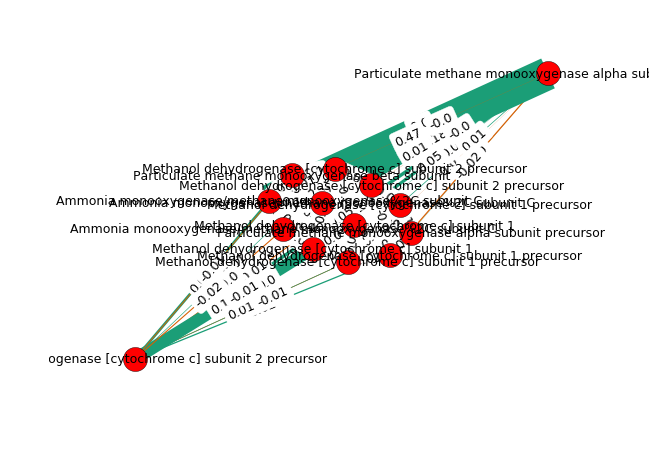

In [33]:
methylotrophy_genes = ['ethane', 'Methanol', 'hexulose-6-phosphate']
methylotrophy_nodes = nxe.get_nodes_including_list_of_strings(n_toy, methylotrophy_genes)
#mSG = nx.Graph(methylotrophy_nodes)
#methylotrophy_network = nx.Graph(n_toy(mSG.nodes()))
methylotrophy_network = n_toy.subgraph(methylotrophy_nodes)
mnt = nxe.subgraph_by_cutoff(methylotrophy_network, cutoff = 0.15)
nxe.draw(mnt, layout=partial(nx.spring_layout, scale = 100), edge_multiplier=50) #, weight='pcor')) 

['3_127354', '2_24713', '3_116438']
of 3 nodes, 3 were unique


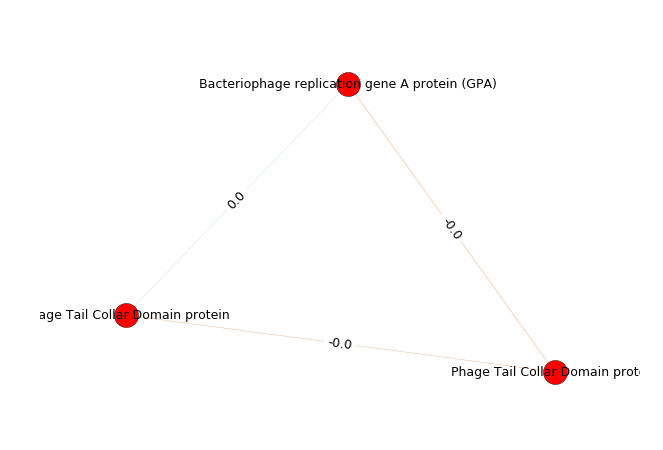

In [37]:
node_strings = ['Phage', 'phage']
nodes = nxe.get_nodes_including_list_of_strings(n_toy, node_strings)
string_network = n_toy.subgraph(nodes)
snt = nxe.subgraph_by_cutoff(string_network, cutoff = 0.0)
nxe.draw(snt, layout=partial(nx.spring_layout, scale = 100), edge_multiplier=100) #, weight='pcor')) 

['2_125461', '5_161996', '2_46326', '3_38699', '3_42494', '4_43633', '4_18954', '1_141442', '5_107303', '4_43634', '1_66818', '4_136246', '1_158680', '1_56778', '1_169467', '1_141443', '5_111949', '2_24713', '2_125462', '3_138949', '3_134999', '2_17600', '2_23528', '2_17601', '1_46481', '3_127354', '5_107304', '3_138947', '2_32337', '2_68948', '1_66817', '2_11926', '2_79568', '3_116438', '4_173495', '3_40323', '1_66816', '1_82314', '2_127420', '1_12750']
of 40 nodes, 40 were unique


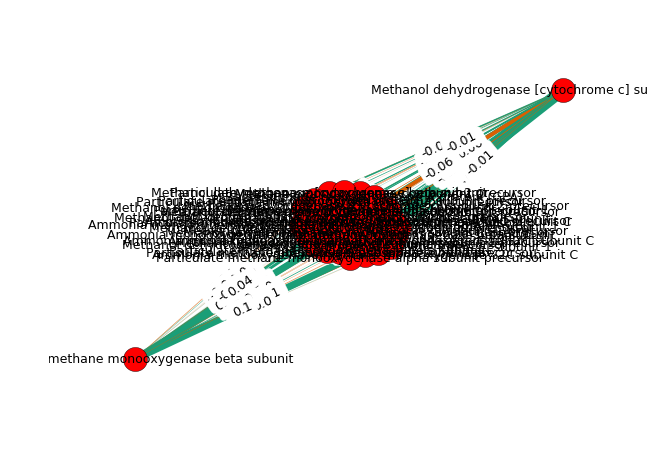

In [35]:
node_strings = ['ethane', 'Methanol', 'hexulose-6-phosphate', 'Phage', 'phage']
nodes = nxe.get_nodes_including_list_of_strings(n_toy, node_strings)
string_network = n_toy.subgraph(nodes)
snt = nxe.subgraph_by_cutoff(string_network, cutoff = 0.0)
nxe.draw(snt, layout=partial(nx.spring_layout, scale = 100), edge_multiplier=50) #, weight='pcor')) 